<a href="https://colab.research.google.com/github/dzuwatalandila-creator/aiclass/blob/main/PERSONAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Heart Disease Prediction Using Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/framingham_updated.csv")
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [ ]:
df.drop(columns=['education'], inplace = True, axis = 1)
df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [ ]:
print(df)

      Sex_male  age  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
0            1   39              0         0.0  0.000000                0   
1            0   46              0         0.0  0.000000                0   
2            1   48              1        20.0  0.000000                0   
3            0   61              1        30.0  0.000000                0   
4            0   46              1        23.0  0.000000                0   
...        ...  ...            ...         ...       ...              ...   
4235         0   48              1        20.0  0.029615                0   
4236         0   44              1        15.0  0.000000                0   
4237         0   52              0         0.0  0.000000                0   
4238         1   40              0         0.0  0.000000                0   
4239         0   39              1        30.0  0.000000                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0 

In [ ]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [ ]:
X = np.asarray(df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X,y,test_size = 0.3,random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2968, 6) (2968,)
Test set: (1272, 6) (1272,)


/tmp/ipython-input-1953250229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD',


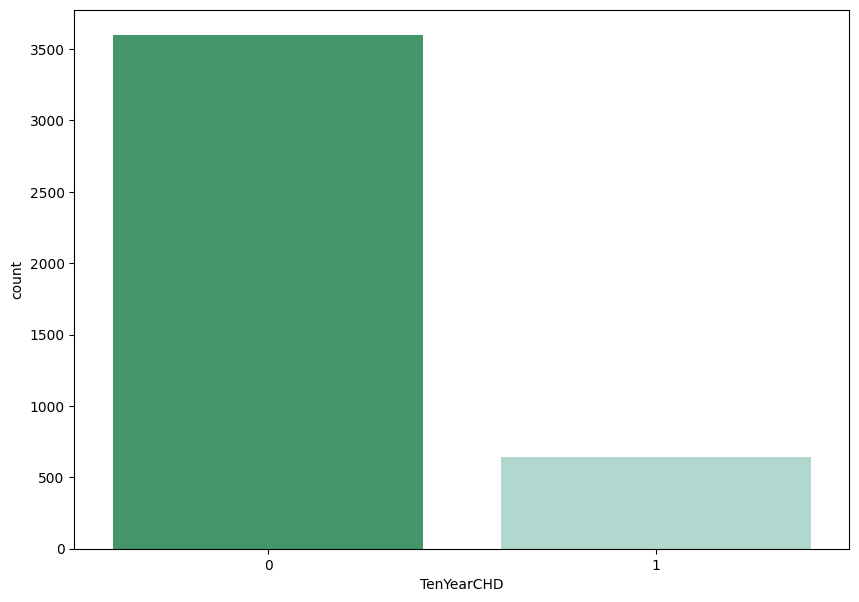

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='TenYearCHD',
              data=df,
             palette="BuGn_r")
plt.show()

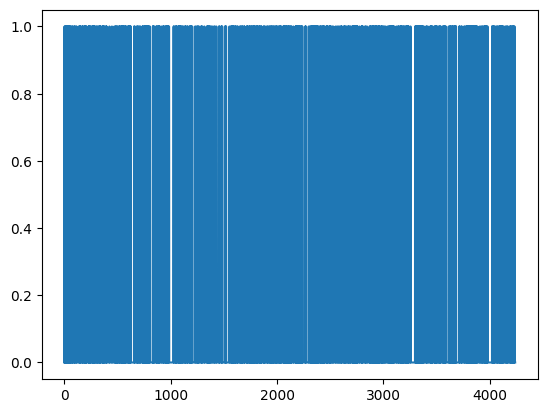

In [ ]:
laste =df['TenYearCHD'].plot()
plt.show(laste)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8569182389937107


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.69      0.06      0.11       188

    accuracy                           0.86      1272
   macro avg       0.77      0.53      0.52      1272
weighted avg       0.83      0.86      0.80      1272



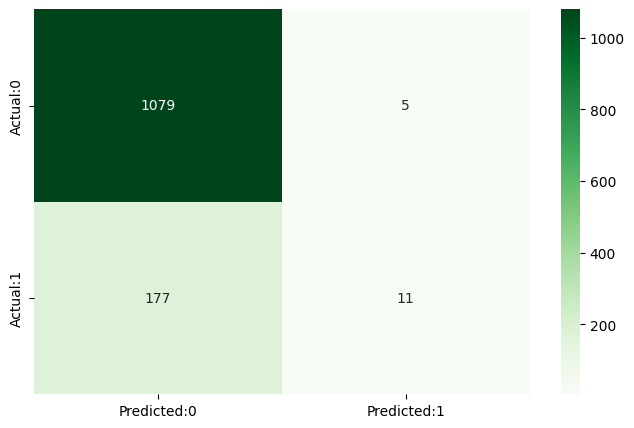

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,

                          columns = ['Predicted:0', 'Predicted:1'],
                          index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()